# READ ME

1. The notebook should be on L4 GPU.
2. Upload the 'fine_tuned_blip_large_celeba.zip' zip file to the colab folder.
3. Upload input images from images (from github) for which captions are to be generated.
4. Run all the cells.
5. Caption will be generated for the input images.

**Additional:**

If you want to test the model on a particular image then at the end of examples the last cell has the code to execute in comments. Remove the comments and execute it.

# Packages

In [1]:
import zipfile
import os
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Loading fine tuned model

In [2]:
# Unzip the fine tuned model folder
zip_path = "fine_tuned_blip_large_celeba.zip"  # Path to the zip file
unzip_dir = "fine_tuned_blip_large_celeba"     # Directory to unzip into

In [3]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [4]:
print(f"Model unzipped to {unzip_dir}")

Model unzipped to fine_tuned_blip_large_celeba


In [5]:
# Load the fine tuned model and processor
model = BlipForConditionalGeneration.from_pretrained(unzip_dir, torch_dtype=torch.float16)
processor = BlipProcessor.from_pretrained(unzip_dir)

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-23): 24 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (projection): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          )
          (layer_norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((1024,),

# Testing the model on example images

In [7]:
def test_random_image(image_path, model, processor, device):
    """
    Test the fine-tuned model on a random image and generate a caption.
    Display the input image alongside the generated caption.

    Args:
        image_path (str): Path to the image file.
        model: Fine-tuned model.
        processor: Processor for preprocessing the image.
        device: Device to run the model on.

    Returns:
        str: Generated caption for the image.
    """
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor.image_processor(images=image, return_tensors="pt")["pixel_values"].to(device)

    # Generate prediction
    model.eval()
    with torch.no_grad():
        outputs = model.generate(
            pixel_values=pixel_values,
            max_length=64,
            num_beams=5,
            early_stopping=True
        )

    # Decode the generated caption
    caption = processor.tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Display the image and caption
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    return caption

# Examples

## Image 1

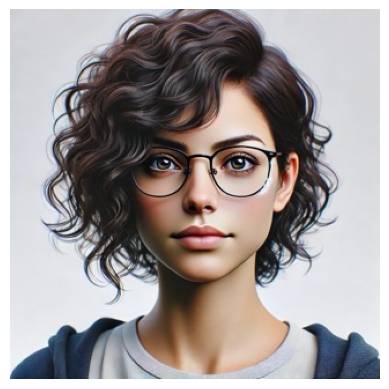

Generated Caption: the person in the image is a young woman with a round face, large eyes, and a small nose. she has a small nose, a wide nose, and a thin mouth. her hair is dark brown and she is wearing glasses. the woman is described as a young adult, but her exact age cannot


In [8]:
input_image_path = "img1.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 1:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young woman with a round face, large eyes, and a small nose. she has a small nose, a wide nose, and a thin mouth. her hair is dark brown and she is wearing glasses. the woman is described as a young adult, but her exact age cannot

**Generated Image:**

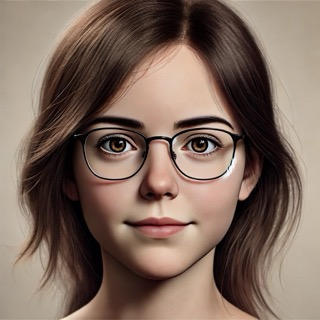

## Image 2

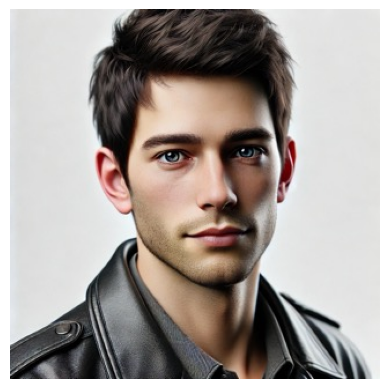

Generated Caption: the person in the image is a young man with a beard, wearing a leather jacket. he has a round face, a small nose, and a thin mouth. his eyes are large and blue, and he is wearing glasses. the young man is described as a young adult, but it is not possible to


In [9]:
input_image_path = "img2.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 2:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young man with a beard, wearing a leather jacket. he has a round face, a small nose, and a thin mouth. his eyes are large and blue, and he is wearing glasses. the young man is described as a young adult, but it is not possible to

**Generated Image:**

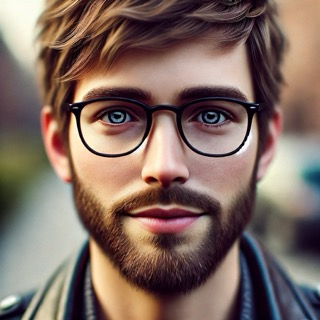

## Image 3

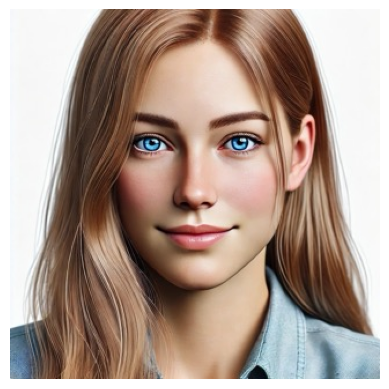

Generated Caption: the person in the image is a young woman with long blonde hair. she has blue eyes, a small nose, and a thin mouth. her facial shape is oval, and her eyes are large and brown. she is wearing glasses and has a denim jacket on. the woman is not wearing any visible accessories,


In [10]:
input_image_path = "img3.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 3:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young woman with long blonde hair. she has blue eyes, a small nose, and a thin mouth. her facial shape is oval, and her eyes are large and brown. she is wearing glasses and has a denim jacket on. the woman is not wearing any visible accessories,

**Generated Image:**

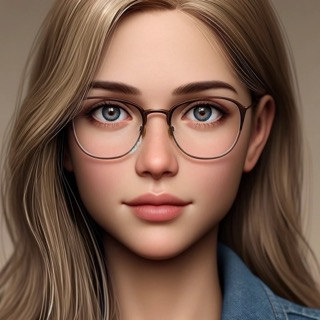

## Image 4

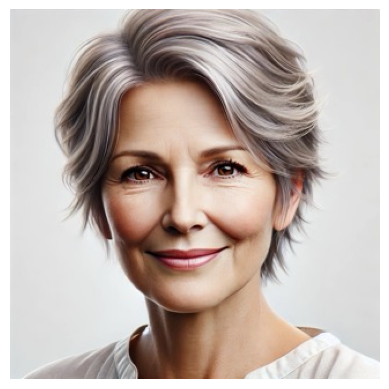

Generated Caption: the person in the image is a woman with a round face, large eyes, and a smile. she has a small nose, a thin mouth, and a wide forehead. her hair is gray and styled in a ponytail. she is wearing glasses and has a smile on her face. the woman is described as


In [11]:
input_image_path = "img4.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 4:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a woman with a round face, large eyes, and a smile. she has a small nose, a thin mouth, and a wide forehead. her hair is gray and styled in a ponytail. she is wearing glasses and has a smile on her face. the woman is described as

**Generated Image:**

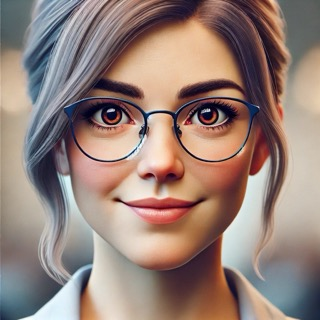

## Image 5

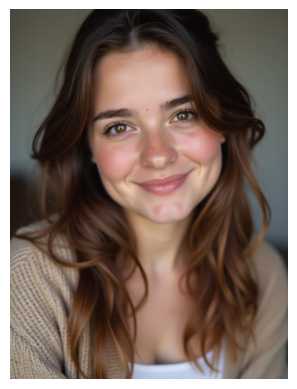

Generated Caption: the person in the image is a young woman with long, curly hair. she has a heart - shaped face, a small nose, and a wide mouth. her eyes are large and brown, and she is wearing glasses. her hair is blonde, and she has a smile on her face. the woman is


In [12]:
input_image_path = "img5.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 5:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young woman with long, curly hair. she has a heart - shaped face, a small nose, and a wide mouth. her eyes are large and brown, and she is wearing glasses. her hair is blonde, and she has a smile on her face. the woman is

**Generated Image:**

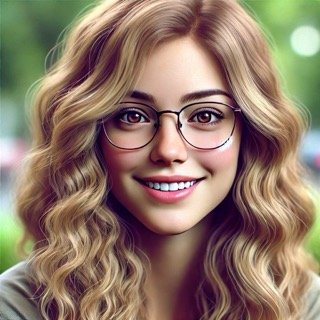

## Image 6

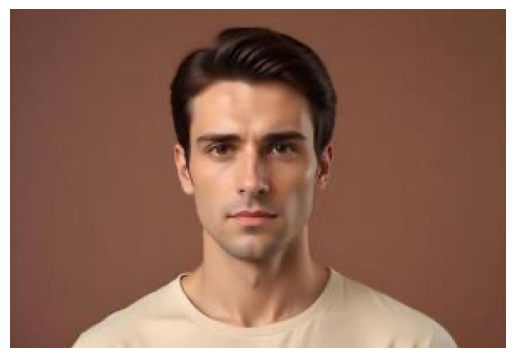

Generated Caption: the person in the image is a young man with a beard, wearing glasses. he has a round face, a small nose, and a thin mouth. his eyes are large and brown, and he is wearing a white shirt. the image does not provide enough information to determine the person ' s race, gender


In [13]:
input_image_path = "img6.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 6:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young man with a beard, wearing glasses. he has a round face, a small nose, and a thin mouth. his eyes are large and brown, and he is wearing a white shirt. the image does not provide enough information to determine the person ' s race, gender

**Generated Image:**

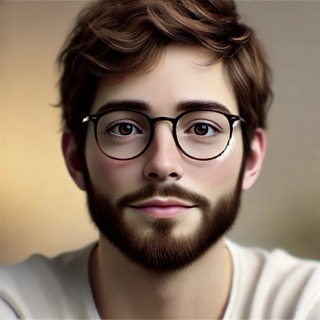

## Image 7

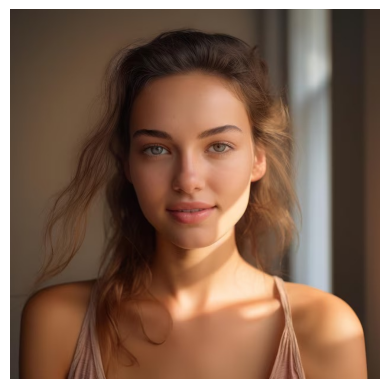

Generated Caption: the person in the image is a young woman with long, curly hair. she has a heart - shaped face, a small nose, and a wide mouth. her eyes are large and brown, and she is wearing glasses. her hair is blonde, and she is wearing a necklace. the woman is not wearing


In [14]:
input_image_path = "img7.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 7:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young woman with long, curly hair. she has a heart - shaped face, a small nose, and a wide mouth. her eyes are large and brown, and she is wearing glasses. her hair is blonde, and she is wearing a necklace. the woman is not wearing

**Generated Image:**

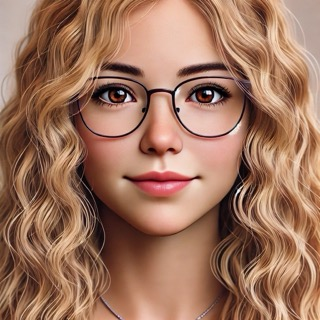

## Image 8

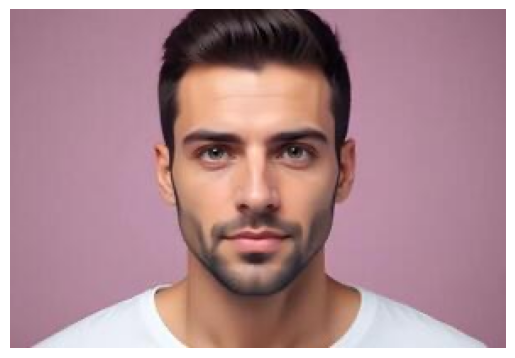

Generated Caption: the person in the image is a young man with a beard, wearing glasses. he has a round face, a small nose, and a thin mouth. his eyes are large and brown, and he is wearing a white shirt. the image does not provide enough information to determine the person ' s race, gender


In [15]:
input_image_path = "img8.jpeg"
caption = test_random_image(input_image_path, model, processor, device)
print(f"Generated Caption: {caption}")

**Generated image based on caption for Image 8:**

**Prompt:**

Generate a realistic image of a person based on the description - the person in the image is a young man with a beard, wearing glasses. he has a round face, a small nose, and a thin mouth. his eyes are large and brown, and he is wearing a white shirt. the image does not provide enough information to determine the person ' s race, gender

**Generated Image:**

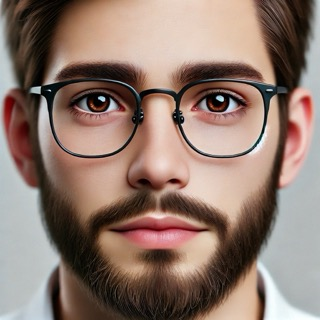

# Test on a particular image

In [16]:
#input_image_path = "path_to_particular_image"
#caption = test_random_image(input_image_path, model, processor, device)
#print(f"Generated Caption: {caption}")